### Edgar Moises Hernandez-Gonzalez
#### 12/12/19-10/02/20
#### Clasificacion de imagenes motoras en EEG con CNN-1D + LSTM o CNN-1D + GRU
##### Caracteristicas = Coeficientes DWT-db4, dos niveles
##### 5 ejecuciones independientes

#### CNN-1D + LSTM
##### Sujeto 1
##### Accuracy = 41.32%
##### Kappa = 0.2176

#### CNN-1D + GRU
##### Sujeto 1
##### Accuracy = 37.85%
##### Kappa = 0.1713

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import cohen_kappa_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/MI-EEG-DWT-Coef-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/MI-EEG-DWT-Coef-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22286)
(288, 22286)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 1, 22, 1013))
x_test = x_test.reshape((n_samples_test, 1, 22, 1013))

print(x_train.shape)
print(x_test.shape)

(288, 1, 22, 1013)
(288, 1, 22, 1013)


In [9]:
x_train = np.transpose(x_train, (0,1,3,2))
x_test = np.transpose(x_test, (0,1,3,2))

print(x_train.shape)
print(x_test.shape)

(288, 1, 1013, 22)
(288, 1, 1013, 22)


In [0]:
def CNN_1D_LSTM():
  model = Sequential()
  model.add(TimeDistributed(Conv1D(32, 3, activation='relu'), input_shape=(None,1013,22)))
  model.add(TimeDistributed(Flatten()))
  model.add(LSTM(128))
  model.add(Dense(n_classes, activation='softmax'))

  optimizer = Adam(lr=1e-3)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [0]:
def CNN_1D_GRU():
  model = Sequential()
  model.add(TimeDistributed(Conv1D(32, 3, activation='relu'), input_shape=(None,1013,22)))
  model.add(TimeDistributed(Flatten()))
  model.add(GRU(128))
  model.add(Dense(n_classes, activation='softmax'))

  optimizer = Adam(lr=1e-3)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
288/288 - 0s - loss: 2.7516 - acc: 0.3785
kappa:  0.17129629629629628
f1: 0.38236667290978893
confusion matrix:
 [[29 28  9  6]
 [38 27  3  4]
 [23  6 22 21]
 [16  9 16 31]]


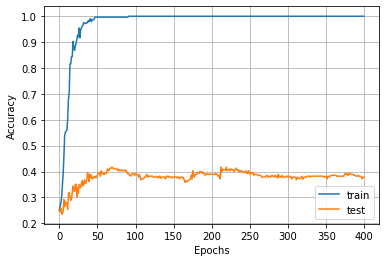

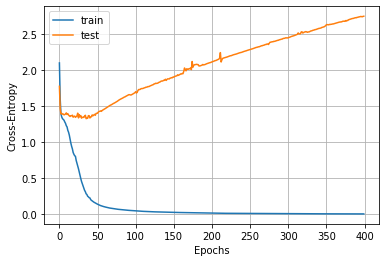

Iteration: 2
288/288 - 0s - loss: 2.9489 - acc: 0.3715
kappa:  0.1620370370370371
f1: 0.36437003348847
confusion matrix:
 [[19 44  7  2]
 [23 41  5  3]
 [11 14 25 22]
 [ 9 11 30 22]]


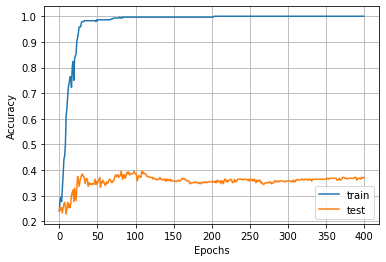

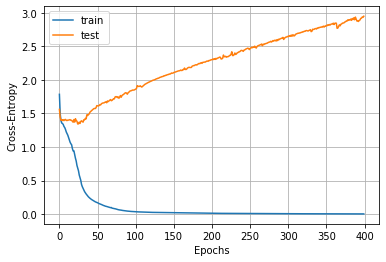

Iteration: 3
288/288 - 0s - loss: 3.3067 - acc: 0.3507
kappa:  0.1342592592592593
f1: 0.3535747545658773
confusion matrix:
 [[21 37 11  3]
 [30 29  9  4]
 [15 13 28 16]
 [12 16 21 23]]


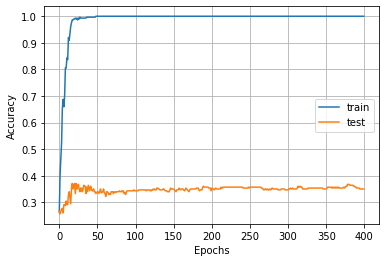

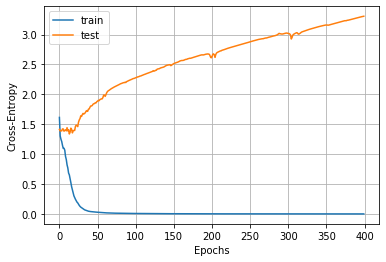

Iteration: 4
288/288 - 0s - loss: 3.5816 - acc: 0.3403
kappa:  0.12037037037037035
f1: 0.33670919284930934
confusion matrix:
 [[17 39 12  4]
 [23 35  9  5]
 [14 11 26 21]
 [15 20 17 20]]


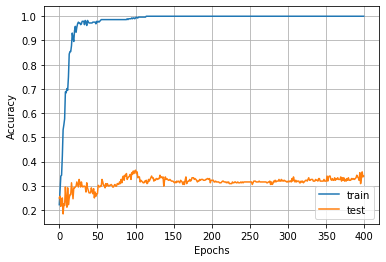

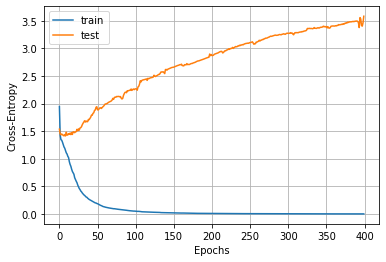

Iteration: 5
288/288 - 0s - loss: 3.3266 - acc: 0.3472
kappa:  0.12962962962962965
f1: 0.3451267248524476
confusion matrix:
 [[16 39  7 10]
 [31 32  7  2]
 [10 15 20 27]
 [13 13 14 32]]


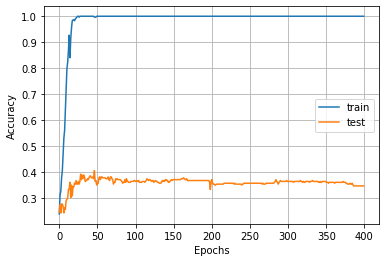

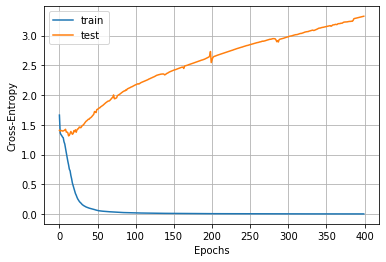


Resultados:
loss: [2.7515674432118735, 2.948940489027235, 3.306650082270304, 3.5816490120357938, 3.3266144593556723]
accuracy: [0.3784722, 0.3715278, 0.35069445, 0.3402778, 0.3472222]
kappa: [0.17129629629629628, 0.1620370370370371, 0.1342592592592593, 0.12037037037037035, 0.12962962962962965]
f1: [0.38236667290978893, 0.36437003348847, 0.3535747545658773, 0.33670919284930934, 0.3451267248524476]


In [11]:
array_loss = []
array_acc = []
array_kappa = []
array_f1 = []
for i in range(5):
    print("Iteration:", i+1);
    
    model = CNN_1D_GRU()

    history = model.fit(x_train, y_train, epochs=400, batch_size=18,
                        validation_data=(x_test, y_test), verbose=0)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    array_loss.append(test_loss)
    array_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    
    kappa = cohen_kappa_score(y_test, y_pred)
    array_kappa.append(kappa)
    print("kappa: ", kappa)

    f1 = f1_score(y_test, y_pred, average='macro')
    array_f1.append(f1)
    print("f1:", f1)
    
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_loss)
print("accuracy:", array_acc)
print("kappa:", array_kappa)
print("f1:", array_f1)

In [12]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_8 (TimeDist (None, None, 1011, 32)    2144      
_________________________________________________________________
time_distributed_9 (TimeDist (None, None, 32352)       0         
_________________________________________________________________
gru_4 (GRU)                  (None, 128)               12472704  
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 516       
Total params: 12,475,364
Trainable params: 12,475,364
Non-trainable params: 0
_________________________________________________________________


In [13]:
print("Mean Accuracy: %.4f" % np.mean(array_acc))
print("Mean Kappa: %.4f" % np.mean(array_kappa))
print("Mean F1: %.4f" % np.mean(array_f1))
print("Max Accuracy: %.4f" % np.max(array_acc))
print("Max Kappa: %.4f" % np.max(array_kappa))
print("Max F1: %.4f" % np.max(array_f1))

Mean Accuracy: 0.3576
Mean Kappa: 0.1435
Mean F1: 0.3564
Max Accuracy: 0.3785
Max Kappa: 0.1713
Max F1: 0.3824
